Strain localization is a spatial autocorrelation phenomenon: because of both geometry and crystallography, strain is not randomly distributed throughout the microstructure. Thus, it is a proper measure for the optimization of high-strength materials. The optimal behavior is discontinuous (and, frankly, unphysical): the autocorrelation starts at a value of 1, before the application of load, and drops to zero (randomly oriented) at the instant that load is applied. This serves as a motivating example for performing a time-series analysis of the spatial autocorrelation: we study the slope of the autocorrelation in the elastic regime, as a predictor for behavior in the plastic regime. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysal
import numpy as np
import pandas as pd
import itertools

Let's first compute the Global Moran's I for a completely random strain energy density state.

In [2]:
indices = np.array(list(itertools.product(range(128),range(128),range(128))))
weights = pysal.weights.KNN(indices, k = 4)

In [3]:
random_strain = np.random.rand(128,128,128)
mr_random = pysal.Moran(random_strain.flatten(),weights)
print('Randomly Distributed Strain: {}'.format(mr_random.I))

Randomly Distributed Strain: 0.00018482922539159928


In [4]:
def strain_energy_density(synthetic,index):
    if index < 10:
        index = '0'+str(index)
    else:
        index = str(index)
    if synthetic:
        strain = pd.read_csv('/home/toby/pollock/fft/Rene88/'+\
                             'synthetic/R88-synthetic-sfield-00'+index+\
                             '/R88-synthetic-sfield-00'+index+'-0000000000.output',\
                             delim_whitespace=True,skiprows=3)
        stress = pd.read_csv('/home/toby/pollock/fft/Rene88/'+\
                             'synthetic/R88-synthetic-efield-00'+index+\
                             '/R88-synthetic-efield-00'+index+'-0000000000.output',\
                             delim_whitespace=True,skiprows=3)

    else:
        strain = pd.read_csv('/home/toby/pollock/fft/Rene88/'+\
                             'experimental/R88-experimental-sfield-00'+index+\
                             '/R88-experimental-sfield-00'+index+'-0000000000.output',\
                             delim_whitespace=True,skiprows=3)
        stress = pd.read_csv('/home/toby/pollock/fft/Rene88/'+\
                             'experimental/R88-experimental-efield-00'+index+\
                             '/R88-experimental-efield-00'+index+'-0000000000.output',\
                             delim_whitespace=True,skiprows=3)
    ''' Calculate strain energy density '''
    strain_energy_density = 0.5*(strain['str11'].values*stress['e11'].values +\
                                 strain['str22'].values*stress['e22'].values +\
                                 strain['str33'].values*stress['e33'].values +\
                               2*strain['str23'].values*stress['e23'].values +\
                               2*strain['str13'].values*stress['e13'].values +\
                               2*strain['str12'].values*stress['e12'].values)
    sed = strain_energy_density.reshape(128,128,128,order='F')
    return sed

In [5]:
datasets = ['Synthetic','Experimental']
synthetic_I = []
experimental_I = []
for dataset in datasets:
    print('Computing {} Spatial Autocorrelations'.format(dataset))
    for index in range(1,11):
        sed = strain_energy_density(dataset=='Synthetic',index)
        I = pysal.Moran(sed.flatten(),weights).I
        if dataset == 'Synthetic':
            synthetic_I.append(I)
        else:
            experimental_I.append(I)

Computing Synthetic Spatial Autocorrelations
Computing Experimental Spatial Autocorrelations


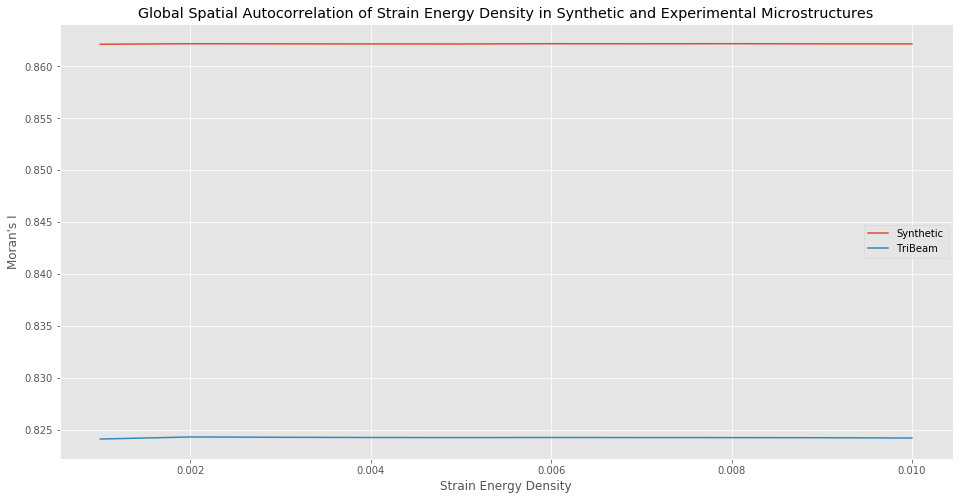

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
plt.plot(np.arange(0.001,0.011,0.001),synthetic_I,label='Synthetic')
plt.plot(np.arange(0.001,0.011,0.001),experimental_I,label='TriBeam')
plt.legend()
plt.xlabel('Strain Energy Density')
plt.ylabel('Moran\'s I')
plt.title('Global Spatial Autocorrelation of Strain Energy Density in Synthetic and Experimental Microstructures')